<a href="https://colab.research.google.com/github/Krishnapabbu17/diamonds-analysis/blob/main/written_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Cut Above the Rest: Using Random Forest and XGBoost to Classify Diamond Cut Quality**
Krishna Pabbu

# Abstract
Diamond cut is a critical factor influencing a diamond’s brilliance and value, yet grading cut quality can be subjective. This project asks whether machine learning models can accurately classify a diamond’s cut grade as “High” (Ideal/Premium) vs “Low” (Very Good/Good/Fair) using features like carat weight, depth percentage, table percentage, color grade (D–J), and clarity grade (I1–IF). We used a public dataset of ~54,000 round-cut diamonds. After cleaning (removing zero dimensions and outliers) and grouping cut grades into High/Low classes, we selected key features based on statistical tests. We trained a Random Forest (with class weighting to address class imbalance) and an XGBoost classifier (with hyperparameter tuning) on an 80/20 stratified train-test split. Both models achieved high overall accuracy (Random Forest ~93.5%, XGBoost ~95.1%). XGBoost slightly outperformed Random Forest, correctly identifying 98% of high-cut diamonds and 75% of low-cut diamonds, whereas Random Forest identified 95% of high-cut and 81% of low-cut diamonds. High-cut diamonds were more prevalent in the data, and the models showed excellent precision on this majority class (≈97% for both). Low-cut classification was less robust, with Random Forest yielding 75% F1 and XGBoost 79% F1 for the minority class. Supervised machine learning can reliably classify diamond cut quality with ~95% accuracy using basic physical and quality features. The models confirm that high and low cut grades have discernible feature differences (e.g., low-cut diamonds tended to be larger in carat and showed different proportion metrics). This approach could aid consistency in grading, though improvement is needed in capturing the minority low-cut cases. Future work should address class imbalance and incorporate additional features to enhance detection of lower-quality cuts.

# Background
Cut quality is one of the “4 Cs” of diamond grading (alongside Carat, Color, Clarity) and is often regarded as the most important factor for a diamond’s brilliance and sparkle. A well-cut diamond reflects light optimally, appearing more radiant, whereas a poorly cut diamond, regardless of size or color, will appear dull. Cut grade also significantly affects price and consumer preference, so consistent and accurate cut classification is important for jewelers and buyers. Traditionally, cut grading is done by expert gemologists evaluating proportions and finish; an accurate automated prediction tool could assist in making this process more objective and efficient.

The dataset used for this project (“Diamonds” dataset) contains information on 53,940 round-cut diamonds, including features such as carat weight, cut quality, price, color grade (D best to J worst), clarity grade (IF/VVS… to I1), and dimensions (depth percentage, table percentage, and length, width, depth measurements in mm). The central research question was: How well can supervised learning models — Random Forest and XGBoost — classify diamond cut quality using features like carat weight, depth percentage, table percentage, color grade, and clarity grade? Our hypothesis was that diamonds with high cut grades would have distinct characteristics (e.g., proportions closer to ideal depth/table values and potentially lower carat weight due to weight sacrificed for better cut) compared to low-grade cuts, allowing a machine learning model to learn these patterns. We expected that ensemble methods like Random Forest and XGBoost would perform well in this classification task given their ability to capture nonlinear relationships and handle mixed data types. The goal was not only to achieve high accuracy, but also to examine which features differentiate high vs low cuts and to see how the models handle the imbalance in class distribution.

# Results
After initial data cleaning (dropping entries with zero dimensions and removing a few extreme outliers in size), we re-labeled the cut attribute into two classes: “High” (Ideal and Premium grades) and “Low” (Very Good, Good, and Fair grades). This made the classification binary. We verified through statistical analysis that our selected features were relevant: for each numeric feature (carat weight, depth%, table%, price, length, width, depth), an independent t-test showed a significant difference in mean between High-cut and Low-cut diamonds (p < 0.05 for all), and chi-square tests indicated the categorical features color and clarity had significant associations with cut class (e.g., better cuts tended to correlate with higher clarity/color grades). Based on these tests and to avoid multicollinearity, we selected five features as model inputs: carat_weight, depth_percent, table_percent, clarity_grade, and color_grade. (Dimensions length, width, depth were dropped after deriving depth%. Price was also excluded from modeling to focus on physical qualities rather than outcomes like price.)

Figure 1. Class Imbalance in Cut Quality Classes:
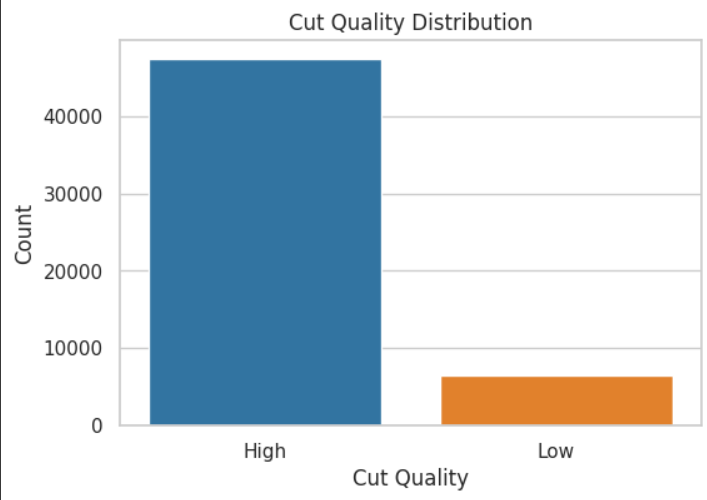

 Bar chart showing the distribution of the two cut quality classes after grouping.

 The High Cut class (Ideal/Premium) comprises the majority of the sample, while the Low Cut class (Very Good/Good/Fair) forms the minority. This class imbalance posed a challenge for modeling, as a classifier could achieve high accuracy by naively predicting the majority class. We addressed this by using stratified train-test splitting and applying class weight adjustments in the Random Forest model (giving more weight to the minority class) to encourage the model to learn patterns for the Low Cut diamonds despite their rarity.

Figure 2. Distribution of Carat Weight by Cut Quality:
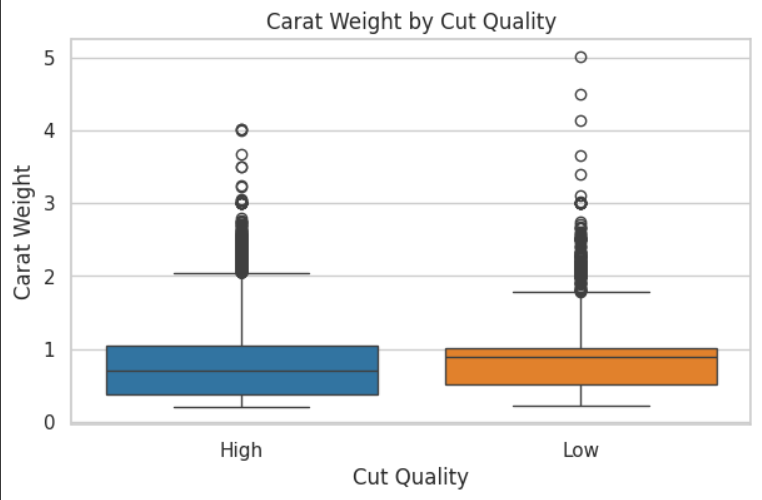

Boxplots of carat weight for High vs Low cut classes.

 High-cut diamonds tend to have lower carat weights on average, with a median around 0.7 carats, whereas Low-cut diamonds have a higher median around 0.9–1.0 carats and a longer upper tail of large stones. The High-cut box is lower and tighter, while the Low-cut box is higher and more spread out, with many outlier points above 2–3 carats. This indicates that diamonds with poorer cut grades are often larger in size. A two-sample t-test confirmed the mean carat difference is significant (p < 0.001), supporting our hypothesis that premium-cut diamonds often sacrifice some weight to achieve ideal proportions. The lowest cut grade (Fair) had an average carat weight substantially larger than the highest grade (Ideal). We observed smaller but significant differences in other numeric features as well: for example, High-cut diamonds tended to have slightly lower table percentages and slightly higher depth percentages on average (closer to known ideal proportions), whereas Low-cut diamonds showed more deviation in proportions.

For categorical features, we found that clarity and color grades were non-uniformly distributed between cut classes (chi-square tests p < 0.01). Diamonds with High cut quality had higher proportions of better clarity grades (e.g., more VVS and VS clarity stones) and tended to avoid the very lowest color grades, whereas Low-cut diamonds had a greater share of inclusions (more SI and I1 clarity) and slightly more in the lower color range (such as J color). These feature differences gave the machine learning models useful signals to distinguish High vs Low cut diamonds.

We trained two supervised learning models to classify the diamonds: a Random Forest classifier and an XGBoost classifier. The models were trained on an 80% subset of the data and tested on the remaining 20%, using stratified sampling to maintain the observed class ratio in both sets. The Random Forest model (100 trees) was given a higher weight for the Low class during training to compensate for imbalance, and the XGBoost model’s hyperparameters (such as tree depth, learning rate, and imbalance parameter) were tuned via cross-validated search to optimize performance. Model performance was evaluated in terms of overall accuracy and class-specific precision, recall, and F1-score.

Overall performance: Both models achieved high accuracy on the test set, with XGBoost performing slightly better. Random Forest attained about 93.5% accuracy, while XGBoost reached about 95.1% accuracy. However, accuracy alone is not sufficient given the imbalance — we need to inspect how well each class was predicted:

Figure 3. Random Forest Confusion Matrix (Test Set):
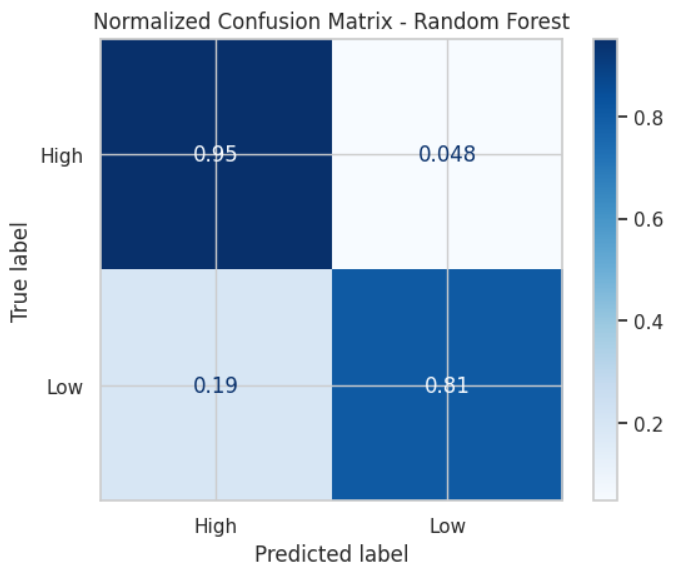

 The model correctly identified 95% of High-cut diamonds (high recall for the majority class). For Low-cut diamonds, the model recalled 81% of them, but showed lower precision for the Low class (about 70%), meaning that some diamonds predicted as Low were actually High. Precision for the High class was ~97%, reflecting very few Low diamonds mistakenly labeled High. The F1-score for the Low class was about 75%, indicating room for improvement in identifying poorer cut diamonds.

Figure 4. XGBoost Confusion Matrix (Test Set):
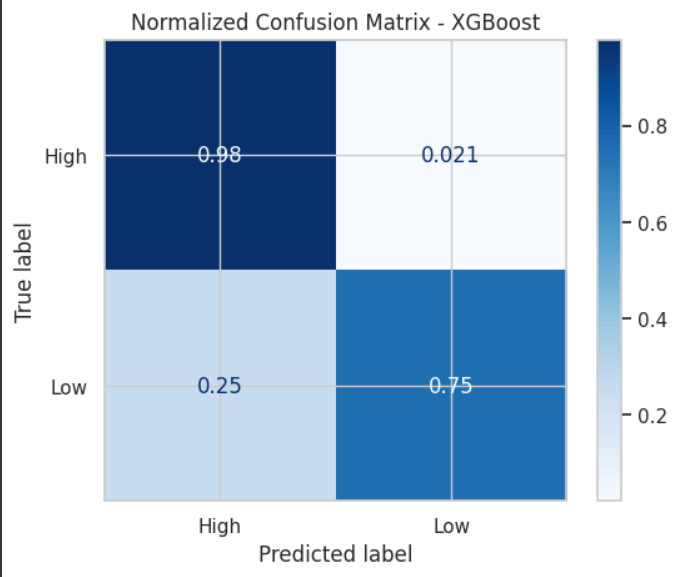

 XGBoost correctly predicted 98% of High-cut diamonds (very high recall for the majority class). For the Low class, recall was 75%, while precision improved to about 83% compared to Random Forest. This indicates a different trade-off: XGBoost reduced false Low predictions (higher precision) at the cost of missing more Low-cut diamonds (lower recall). Overall, XGBoost achieved a slightly higher accuracy and a better F1-score for the Low class (≈79%) than Random Forest (≈75%).

In summary, both models answer the research question affirmatively — they can classify diamond cut quality with high accuracy using the given features. The High vs Low cut distinction was captured well by the algorithms, largely thanks to the strong signal in carat weight and subtle differences in proportions and quality grades. XGBoost emerged as the top performer with ~95% accuracy and the best F1 for the Low class, suggesting it handled the imbalanced data and feature interactions slightly better. Random Forest was not far behind and showed higher sensitivity to the Low class (catching more of the low-grade cuts). For an industry context, these models could reliably identify top-cut diamonds and flag a large fraction of poorer cuts, but still miss some and also occasionally mislabel a high-cut as low. Feature importance rankings (not shown) from both models indicated carat weight as the most influential feature, followed by clarity, color, and the proportions (depth%, table%).

# Discussion
Our findings demonstrate that machine learning is a viable tool for classifying diamond cut quality. The models achieved over 93% accuracy, supporting our hypothesis that a diamond’s measurable attributes contain enough information to predict whether its cut is graded high or low. In practical terms, an automated model could serve as a consistency check or preliminary grader for diamond cuts, potentially speeding up the grading process or flagging diamonds that might need closer manual inspection. The high precision (~97%) on identifying top-grade cuts is especially encouraging — the models very rarely confuse a poor-cut diamond for an excellent cut. This suggests that truly well-cut diamonds have distinctive feature profiles that the algorithms learned effectively. From a gemology perspective, the results reinforce known domain knowledge: for example, we observed that diamonds with lower cut grades tend to be larger and heavier. This aligns with the idea that some diamond cutters prioritize retaining carat weight at the expense of ideal cut proportions, resulting in bigger but duller stones. We also found correlations where high cut quality often coincided with higher clarity and color grades in the dataset, which could reflect a marketplace trend that high-quality rough is often finished with an excellent cut, or that consumers who demand excellent cuts also select for better color/clarity.

Despite the high overall accuracy, there are important limitations to consider. First, the model’s performance on the minority class (Low cut), while decent, is not perfect. Both classifiers struggled more with Low-cut diamonds: Random Forest missed a non-trivial fraction of them, and XGBoost missed more in exchange for higher precision. This is directly related to the class imbalance — the models are biased toward the majority class. We mitigated this by class weighting and tuning, but some imbalance effects remain (e.g., the lower recall or precision for the Low class). Another limitation is that we only used the features available in the dataset. These features, while useful, are limited proxies for cut quality. Cut grade is determined by detailed geometric proportions (crown angle, pavilion depth, symmetry, polish, etc.) which were not explicitly in our data — we only had overall depth% and table%, which only partially capture cut proportions. The model might misclassify some cases because it doesn’t “see” all the nuanced cut parameters that a human grader would consider. Additionally, our analysis (t-tests, etc.) assumed normality/homogeneity for significance testing which may not hold given some features (like price, carat) are skewed; however, the very large sample size likely makes the p-values robust despite minor assumption violations. Another point is that the data consisted solely of round-cut diamonds; thus, our model’s applicability to fancy-shaped diamonds (emerald, princess, etc.) is untested — those cuts have different proportion standards, and a new model would need to be trained for each shape.

# Future Work
Future work should address the above limitations to improve the model’s robustness and usefulness. A priority would be handling the class imbalance more effectively. Techniques like resampling could be applied — for example, oversampling the minority class (perhaps using SMOTE to synthetically generate Low-cut examples) or undersampling the majority class — to help the model pay more equal attention to both classes. This could boost the recall for low-grade cuts without heavily hurting precision. Incorporating additional features or data would likely improve performance as well. If available, we could add more fine-grained cut proportions (e.g., crown angle, pavilion depth, girdle thickness) which are directly tied to cut grading. Feature engineering could also be explored; for instance, combining dimensions into volume or examining the price-per-carat might reveal further separation between high and low cut diamonds. Trying other modeling techniques or ensembles may yield gains — e.g., a stacking ensemble that combines XGBoost, Random Forest, and perhaps a neural network or SVM could capture complementary decision boundaries. We also suggest performing a detailed error analysis on the misclassified diamonds: by examining diamonds that were consistently misclassified (say a Low-cut diamond the model thought was High, or vice versa), we might uncover patterns (perhaps certain borderline proportion values or a particular range of carat and clarity) that could inform adjustments to the model or data preprocessing. Finally, cross-validation on the training process (beyond the single train/test split) would be beneficial to ensure the model generalizes well and isn’t overfit to peculiarities of the given split. Overall, with these improvements, we hope to develop an even more reliable diamond cut classifier that could assist graders or online buyers in the future.

# Code and Data Availability
The Python code used for our data cleaning, analysis, and model training is available in a public GitHub repository here:
https://github.com/Krishnapabbu17/diamonds-analysis.
This repository contains the Jupyter notebooks and scripts documenting all steps of the project, from initial exploration to model evaluation. The diamond dataset is the well-known Diamonds dataset from the R ggplot2 library (also hosted on Kaggle as “Diamonds by Shivam”); it comprises 53,940 entries of diamond characteristics and can be obtained from the ggplot2 documentation or the Kaggle dataset page. All results reported in this study can be reproduced by running the code in the repository on the aforementioned dataset.

# Acknowledgements
I would like to thank my TA Abhishek for his helpful advice and feedback throughout the project, and my mentor Sujay for providing the dataset and guidance on diamond grading concepts. Their support and insights were invaluable to the success of this research. I also extend my gratitude to the organizers of the research program for this opportunity and to my peers for the collaborative learning environment.